Постройте граф всех словных 4-грамм текста. Каждая 4-грамма хранится только один раз.

In [65]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import re
import networkx as nx
import matplotlib.pyplot as plt

In [69]:
# функция предобработки текста
def preprocess(text):
  text = re.sub(r'[^\w\s]', '', text)  # удаляем пунктуацию
  text = re.sub(r'\d', '', text)  # удаляем цифры
  tokens = word_tokenize(text.lower())  # токенизация
  return tokens


# функция для получения уникальных 4-грамм
def get_unique_4grams(tokens):
  return list(set(ngrams(tokens, 4)))


# функция для построения графа
def build_graph(fourgrams):
    G = nx.Graph()

    # добавление узлов
    for fourgram in fourgrams:  # каждый 4-грамм является вершиной
        G.add_node(fourgram)

    # попарно сравниваем 4-граммы и находим их пересечения
    for first_index in range(len(fourgrams) - 1):
      for second_index in range(first_index + 1, len(fourgrams)):
        if len(set(fourgrams[first_index]).intersection(set(fourgrams[second_index]))) > 0:
            G.add_edge(fourgrams[first_index], fourgrams[second_index])  # добавление ребер, если 4-граммы пересекаются
    return G

# функция для чтения файла
def read_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
    return text


# главная функция для реализации всех функций
def main(file_path):
    text = read_file(file_path)

    # вызываем ф-цию предобработки текста
    preprocessed_tokens = preprocess(text)

    # вызываем ф-цию для нахождения 4-грамм
    unique_fourgrams = get_unique_4grams(preprocessed_tokens)

    # вызываем ф-цию для построения графа
    G = build_graph(unique_fourgrams)

    return G


In [70]:
# пример работы программы
file_path = 'пример1.txt'
G = main(file_path)

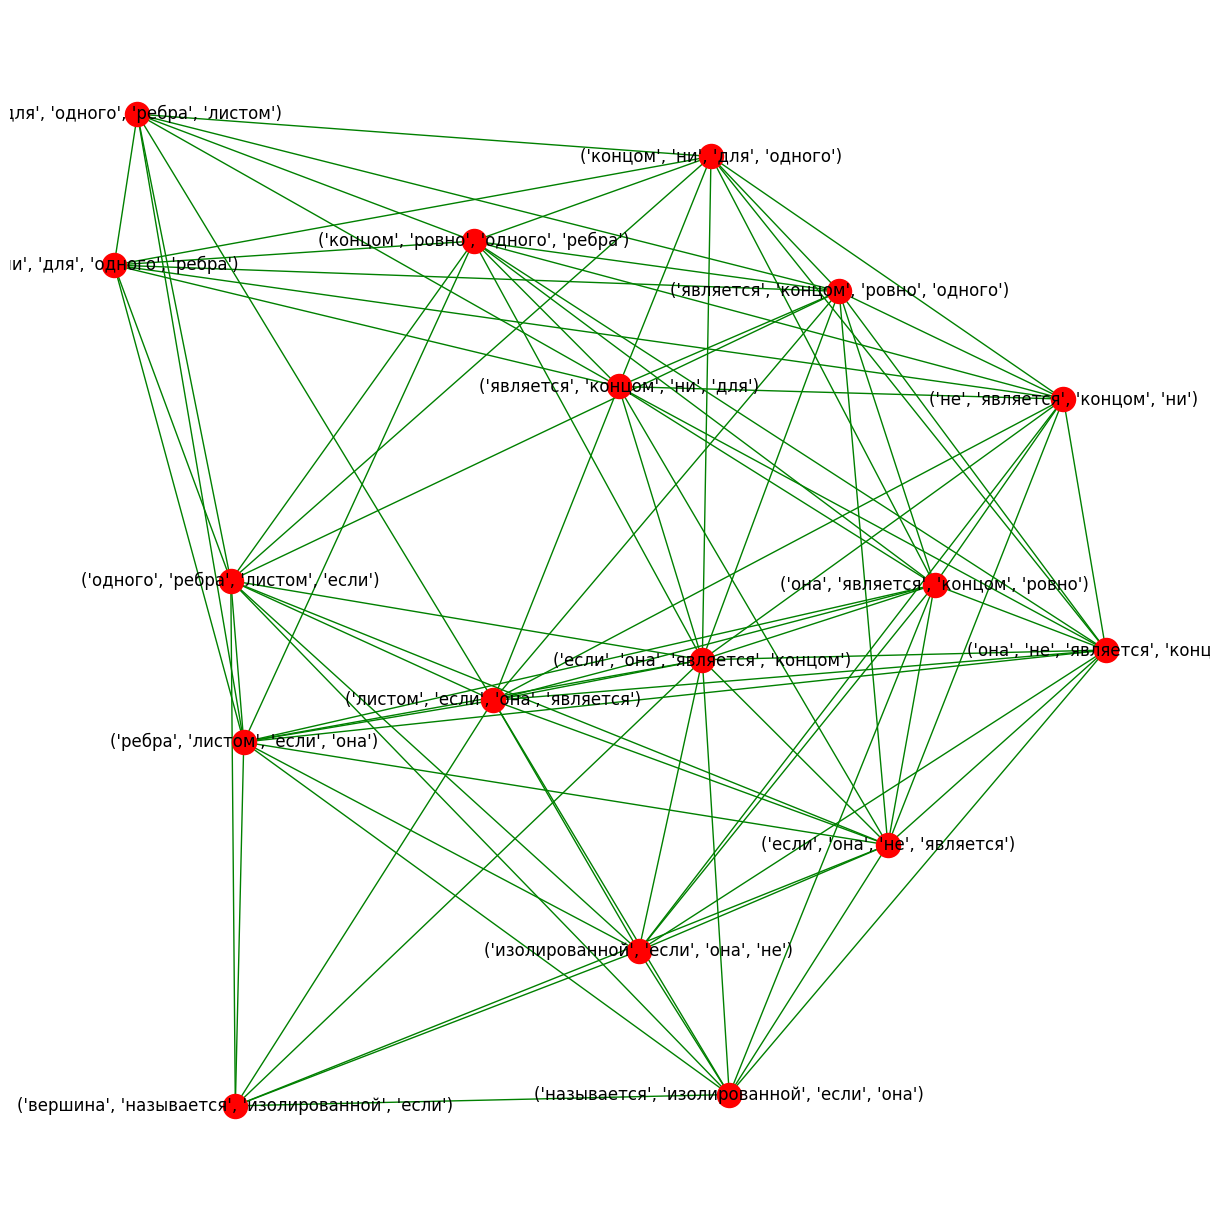

In [71]:
# визуализация графа
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='r', edge_color='g')
plt.show()